### Init

This is a brief demo of the Sum it up

The goal of the game "Sum It Up" is to be the first player to reach 100 points.

Each player's turn consists of repeatedly rolling a die. 

After each roll, the player is faced with two choices: roll again, or hold (fall off to roll again).

If the player rolls a 1, the player scores nothing and it becomes the opponent's turn.

If the player rolls a number other than 1, the number is added to the player's turn total and the player's turn continues.

If the player holds, the turn total, the sum of the rolls during the turn, is added to the player's score, and it becomes the opponent's turn.

For such a simple dice game, one might expect a simple optimal strategy. As we shall see, 

this simple dice game yields a much more complex and captivating optimal policy.

In [147]:
pip install fs

In [148]:
master_file = open("./sum_it_up.py")
exec(master_file.read())
master_file.close()
import os

### Players

Next, we define players. There are three strategies:
-  <code>strategy='learn'</code> $\rightarrow$ learn, i.e. make future decisions based on past decisions; parameter: <code>learn_from</code>, a list of sources to learn from
-  <code>strategy='hold'</code> $\rightarrow$ hold at a specified integer; parameter: <code>hold_at</code>
-  <code>strategy='random'</code> $\rightarrow$ decide randomly whether or not to hold; parameter: <code>hold_p</code>

Consider the following example.

In [149]:
a = Player(name='Teja', write_to='A_demo_dec', strategy = 'learn', learn_from=['A_demo_dec', 'B_demo_dec'])
print(a)

Player: Teja
Data written to: A_demo_dec
Strategy: Learn from the following sources.
 A_demo_dec B_demo_dec


In [150]:
b = Player(name='Bharath', write_to='B_demo_dec', strategy = 'random', hold_p=1)
print(b)

Player: Bharath
Data written to: B_demo_dec
Strategy: Random with probability 1.0.


### Tournament

A tournament is a sequence of games. It is initialised as follows.

In [151]:
t = Tournament(a, b)

We first delete old player data, so that Venkata Teja starts learning from scratch and we can see her improvement over the course of the tournament.

In [152]:
if os.path.isfile('./player_data/A_demo_dec.p'):
    os.remove('./player_data/A_demo_dec.p')
if os.path.isfile('./player_data/B_demo_dec.p'):
    os.remove('./player_data/B_demo_dec.p')

Running <code>play_games()</code> will simulate <code>n</code> (default 100) games. Here, all decisions and whether or not the lead to victory are recorded after each game, and Teja will base future decisions on that experience.

In [153]:
t.play_games(n=10)
print(t)

<string>:248: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/10 [00:00<?, ?it/s]

Teja (5 wins) : (5 wins) Bharath


In [154]:
t.play_games(n=190)
print(t)

<string>:248: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/190 [00:00<?, ?it/s]

Teja (73 wins) : (27 wins) Bharath


In [155]:
t.play_games(n=800)
print(t)

<string>:248: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/800 [00:00<?, ?it/s]

Teja (95 wins) : (5 wins) Bharath


### Output

<code>Player</code> objects as well as <code>Tournament</code>s have can be printed, where printing a tournament gives the score over the last 100 games. Furthermore, can produce the following plot (the sequence that is plotted there can be obtained via <code>results_as_sequence()</code>).

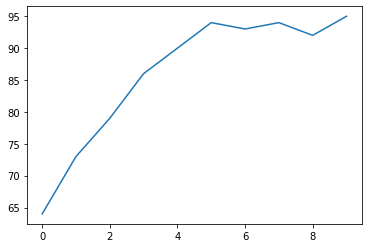

In [156]:
t.plot_results()

### The learning algorithm

The task to be learned is to decide whether to continue a turn or to hold. The decision depends only on the player's score, the opponent's score, and the current turn total (cf. the Wiki page). This gives a small parameter space for the function that makes the decision -- its size is $100 \times 100 \times 100$. Hence, instead of using machine learning algorithms, the decisions that have been made in a game are recorded in a matrix once the game is concluded. This happens by simply increasing counters, and it has the advantage that the space complexity for the algorithm is constant. The matrix is of size $100 \times 100 \times 100 \times 2 \times 2$. If in a subsequent game, Teja has to make a decision for a certain situation <code>own_score</code>, <code>opp_score</code>, <code>turn_total</code> (first three dimesions), then the corresponding $2 \times 2$ matrix (last two dimensions) shows her how often continue/hold decisions have lead to wins/losses in the past. She can then make her decision based on that.

In [157]:
t.play_game()

0 : 0
Turn: 0
Roll: 1
Kicked out.
0 : 0
Turn: 0
Roll: 2
Decided to hold.
2 : 0
Turn: 0
Roll: 1
Kicked out.
2 : 0
Turn: 0
Roll: 2
Turn: 2
Roll: 1
Kicked out.
2 : 0
Turn: 0
Roll: 6
Decided to hold.
2 : 6
Turn: 0
Roll: 3
Decided to hold.
5 : 6
Turn: 0
Roll: 4
Decided to hold.
5 : 10
Turn: 0
Roll: 2
Turn: 2
Roll: 2
Decided to hold.
9 : 10
Turn: 0
Roll: 3
Decided to hold.
9 : 13
Turn: 0
Roll: 1
Kicked out.
9 : 13
Turn: 0
Roll: 4
Decided to hold.
9 : 17
Turn: 0
Roll: 4
Turn: 4
Roll: 3
Decided to hold.
16 : 17
Turn: 0
Roll: 2
Decided to hold.
16 : 19
Turn: 0
Roll: 2
Decided to hold.
18 : 19
Turn: 0
Roll: 3
Decided to hold.
18 : 22
Turn: 0
Roll: 5
Decided to hold.
23 : 22
Turn: 0
Roll: 4
Decided to hold.
23 : 26
Turn: 0
Roll: 4
Decided to hold.
27 : 26
Turn: 0
Roll: 1
Kicked out.
27 : 26
Turn: 0
Roll: 6
Decided to hold.
33 : 26
Turn: 0
Roll: 5
Decided to hold.
33 : 31
Turn: 0
Roll: 5
Turn: 5
Roll: 5
Decided to hold.
43 : 31
Turn: 0
Roll: 1
Kicked out.
43 : 31
Turn: 0
Roll: 4
Turn: 4
Roll: 2
De

[True]

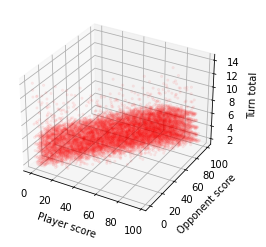

In [158]:
a.visualise_decision_matrix()